<a href="https://colab.research.google.com/github/inschools-ng/001_BattleTank/blob/master/DS2_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Implement and train a CNN model on the Fashion-MNIST dataset using the provided architecture: INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC. Compare the performance of this model against a simple fully connected neural network (FCNN) with the same number of layers and parameters. Interpret the results in terms of accuracy and training time

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from keras.utils import plot_model
%matplotlib inline
import time
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.io as pio
from plotly import tools
from plotly import subplots as sp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

##Exploratory Data Analysis

In [88]:
IMG_ROWS = 32
IMG_COLS = 32
IMG_CHANNELS = 1
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 999
NO_EPOCHS = 10
BATCH_SIZE = 128


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/fashion-mnist_test.csv')

In [ ]:
print("Fashion MNIST train - rows:", train_data.shape[0], "columns:", train_data.shape[1])
print("Fashion MNIST test - rows:", test_data.shape[0], "columns:", test_data.shape[1])

Fashion MNIST train - rows: 60000 columns: 785
Fashion MNIST test - rows: 10000 columns: 785


In [ ]:
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def get_classes_distribution(data):
    label_counts = data["label"].value_counts()
    total_samples = len(data)

    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


In [ ]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle boot          :   1000 or 10.0%


In [ ]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


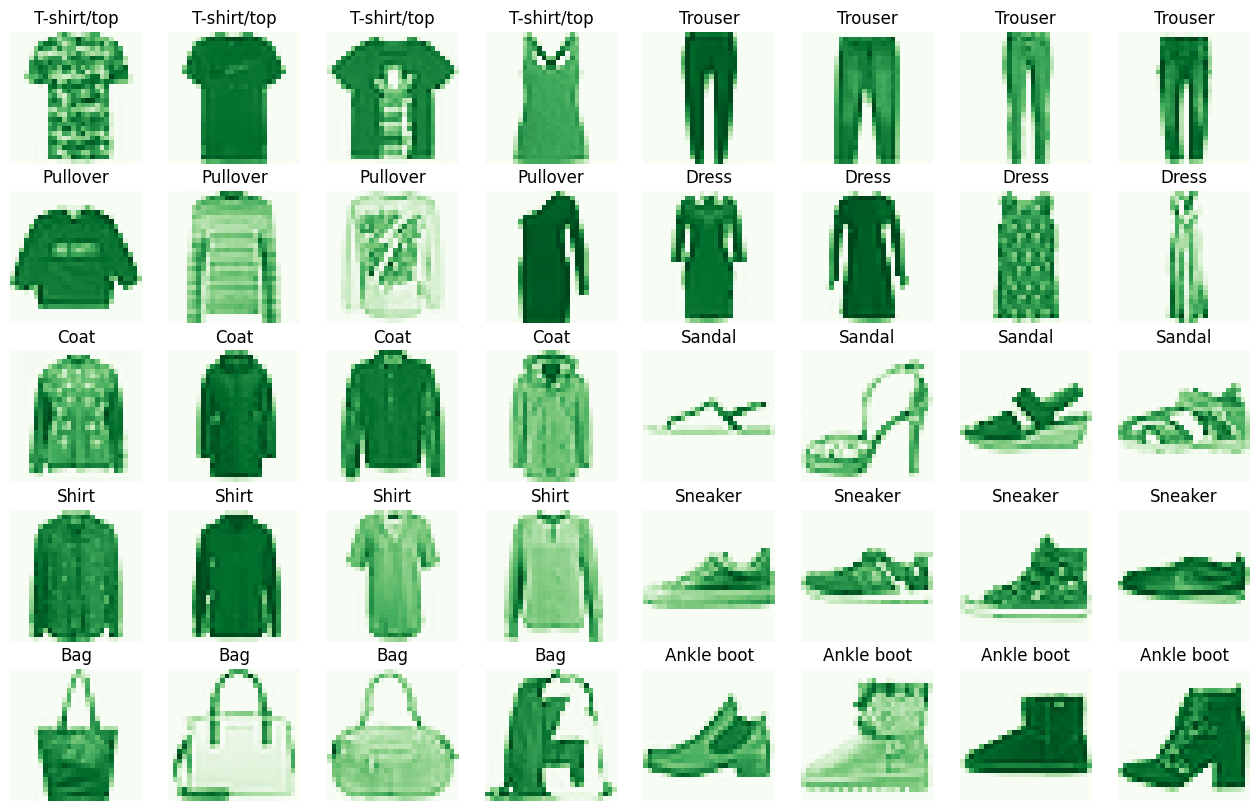

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Greens")

Total number of sample images to plot:  40


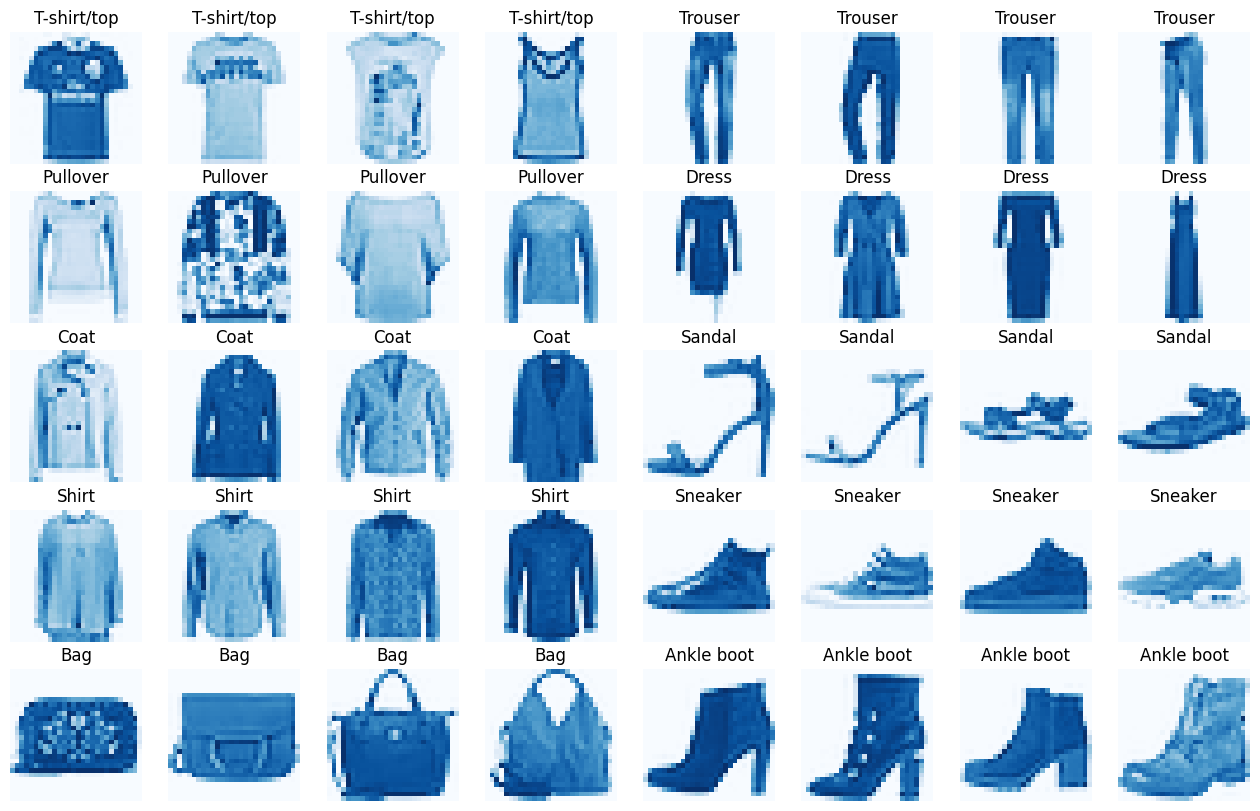

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

##Building the Model

In [ ]:
#Reshaping - data processing

def data_preprocessing(raw):
  out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
  num_images = raw.shape[0]
  x_as_array = raw.values[:,1:]
  x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
  out_x = x_shaped_array / 255
  return out_x, out_y

In [ ]:
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [ ]:
## Train-Test Split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


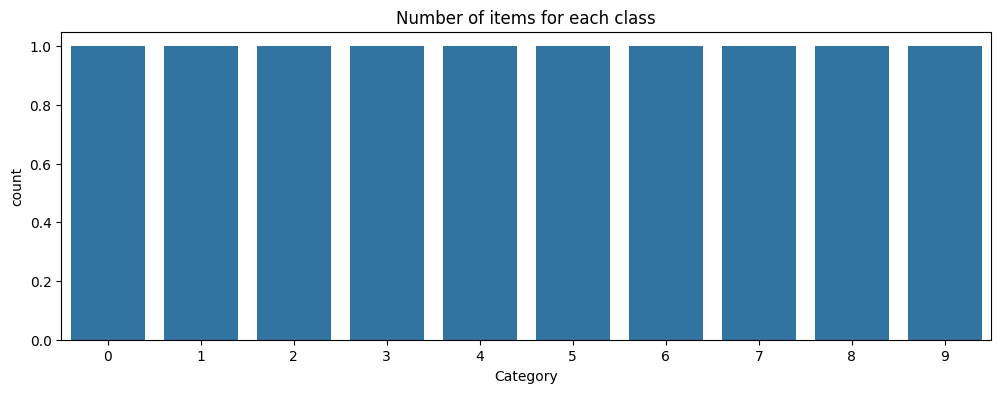

Pullover            :   4826 or 10.054166666666667%
Ankle boot          :   4826 or 10.054166666666667%
Sandal              :   4816 or 10.033333333333333%
Bag                 :   4813 or 10.027083333333334%
Sneaker             :   4811 or 10.022916666666665%
Dress               :   4804 or 10.008333333333333%
Shirt               :   4796 or 9.991666666666667%
Trouser             :   4790 or 9.979166666666666%
Coat                :   4771 or 9.939583333333333%
T-shirt/top         :   4747 or 9.889583333333334%


In [ ]:
## Class imbalance
def plot_count_per_class(yd):
  ydf = pd.DataFrame(yd)
  f, ax = plt.subplots(1,1, figsize=(12,4))
  g = sns.countplot(ydf[0], order=np.arange(0,10))
  g.set_title("Number of items for each class")
  g.set_xlabel("Category")

  for p, label in zip(g.patches, np.arange(0,10)):
    g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
  plt.show()

def get_count_per_class(yd):
  ydf = pd.DataFrame(yd)
  # Get the count for each label
  label_counts = ydf[0].value_counts()
  # Get the total number of samples
  total_samples = len(yd)

  # count the number of items in each class
  for i in range(len(label_counts)):
    label = labels[label_counts.index[i]]
    count = label_counts.values[i]
    percent = (count / total_samples) * 100
    print("{:<20s}:   {} or {}%".format(label, count, percent))

plot_count_per_class(np.argmax(y_train, axis=1))
get_count_per_class(np.argmax(y_train, axis=1))

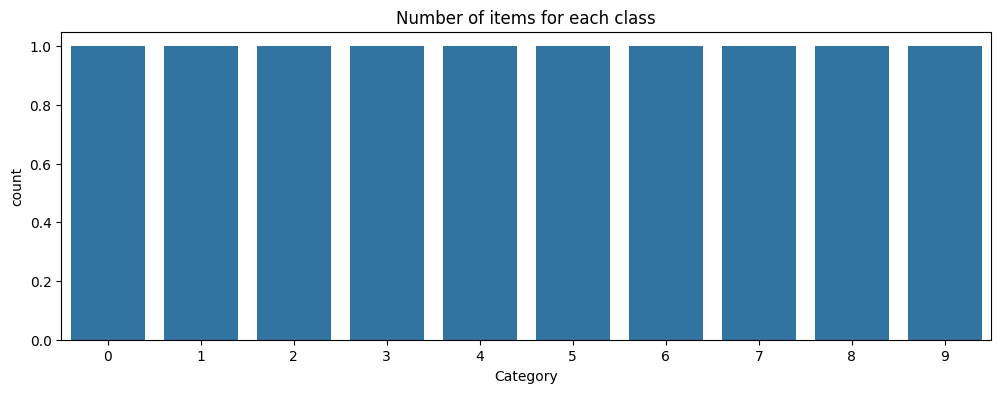

T-shirt/top         :   1253 or 10.441666666666666%
Coat                :   1229 or 10.241666666666667%
Trouser             :   1210 or 10.083333333333332%
Shirt               :   1204 or 10.033333333333333%
Dress               :   1196 or 9.966666666666667%
Sneaker             :   1189 or 9.908333333333333%
Bag                 :   1187 or 9.891666666666667%
Sandal              :   1184 or 9.866666666666667%
Ankle boot          :   1174 or 9.783333333333333%
Pullover            :   1174 or 9.783333333333333%


In [ ]:
plot_count_per_class(np.argmax(y_val, axis=1))
get_count_per_class(np.argmax(y_val, axis=1))

In [ ]:
## Model Training

model = Sequential()

# Add Convolution 2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution 2D
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

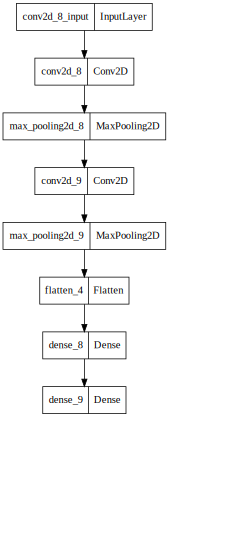

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
#3 Training the Model
start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time
print("CNN Training Time:", cnn_training_time)

Epoch 1/10
375/375 [==============================] - 44s 114ms/step - loss: 0.5814 - accuracy: 0.7901 - val_loss: 0.4073 - val_accuracy: 0.8507
Epoch 2/10
375/375 [==============================] - 40s 106ms/step - loss: 0.3714 - accuracy: 0.8665 - val_loss: 0.3498 - val_accuracy: 0.8721
Epoch 3/10
375/375 [==============================] - 41s 108ms/step - loss: 0.3231 - accuracy: 0.8850 - val_loss: 0.3210 - val_accuracy: 0.8837
Epoch 4/10
375/375 [==============================] - 52s 138ms/step - loss: 0.2908 - accuracy: 0.8957 - val_loss: 0.2957 - val_accuracy: 0.8926
Epoch 5/10
375/375 [==============================] - 38s 101ms/step - loss: 0.2660 - accuracy: 0.9039 - val_loss: 0.2867 - val_accuracy: 0.8958
Epoch 6/10
375/375 [==============================] - 40s 106ms/step - loss: 0.2484 - accuracy: 0.9094 - val_loss: 0.2864 - val_accuracy: 0.8947
Epoch 7/10
375/375 [==============================] - 39s 105ms/step - loss: 0.2313 - accuracy: 0.9143 - val_loss: 0.2873 - val_ac

In [ ]:
## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24599365890026093
Test accuracy: 0.9106000065803528


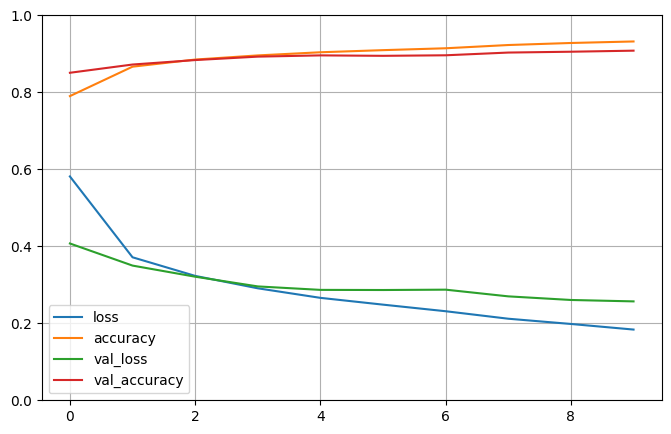

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [ ]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_true = test_data.iloc[:, 0].values

313/313 [==============================] - 3s 9ms/step


In [ ]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9106
Incorrect predicted classes: 894


In [ ]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.86      0.87      0.87      1000
    Class 1 (Trouser) :       0.99      0.98      0.98      1000
   Class 2 (Pullover) :       0.93      0.77      0.84      1000
      Class 3 (Dress) :       0.92      0.92      0.92      1000
       Class 4 (Coat) :       0.83      0.91      0.87      1000
     Class 5 (Sandal) :       0.98      0.98      0.98      1000
      Class 6 (Shirt) :       0.74      0.76      0.75      1000
    Class 7 (Sneaker) :       0.94      0.98      0.96      1000
        Class 8 (Bag) :       0.96      0.99      0.97      1000
 Class 9 (Ankle boot) :       0.97      0.95      0.96      1000

               accuracy                           0.91     10000
              macro avg       0.91      0.91      0.91     10000
           weighted avg       0.91      0.91      0.91     10000



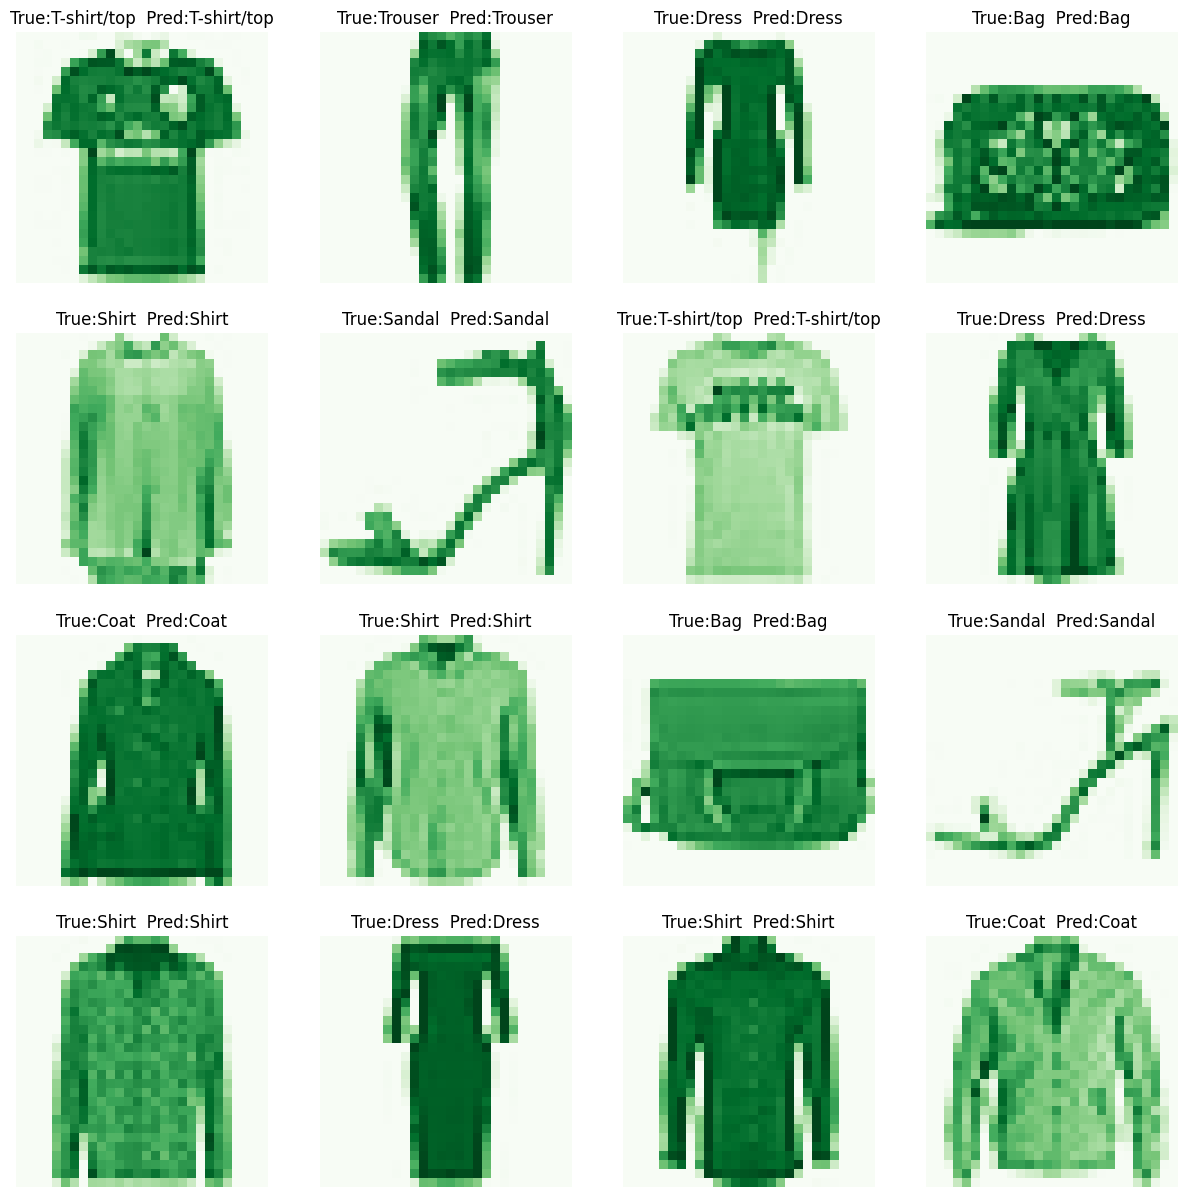

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()

plot_images(correct, "Greens")

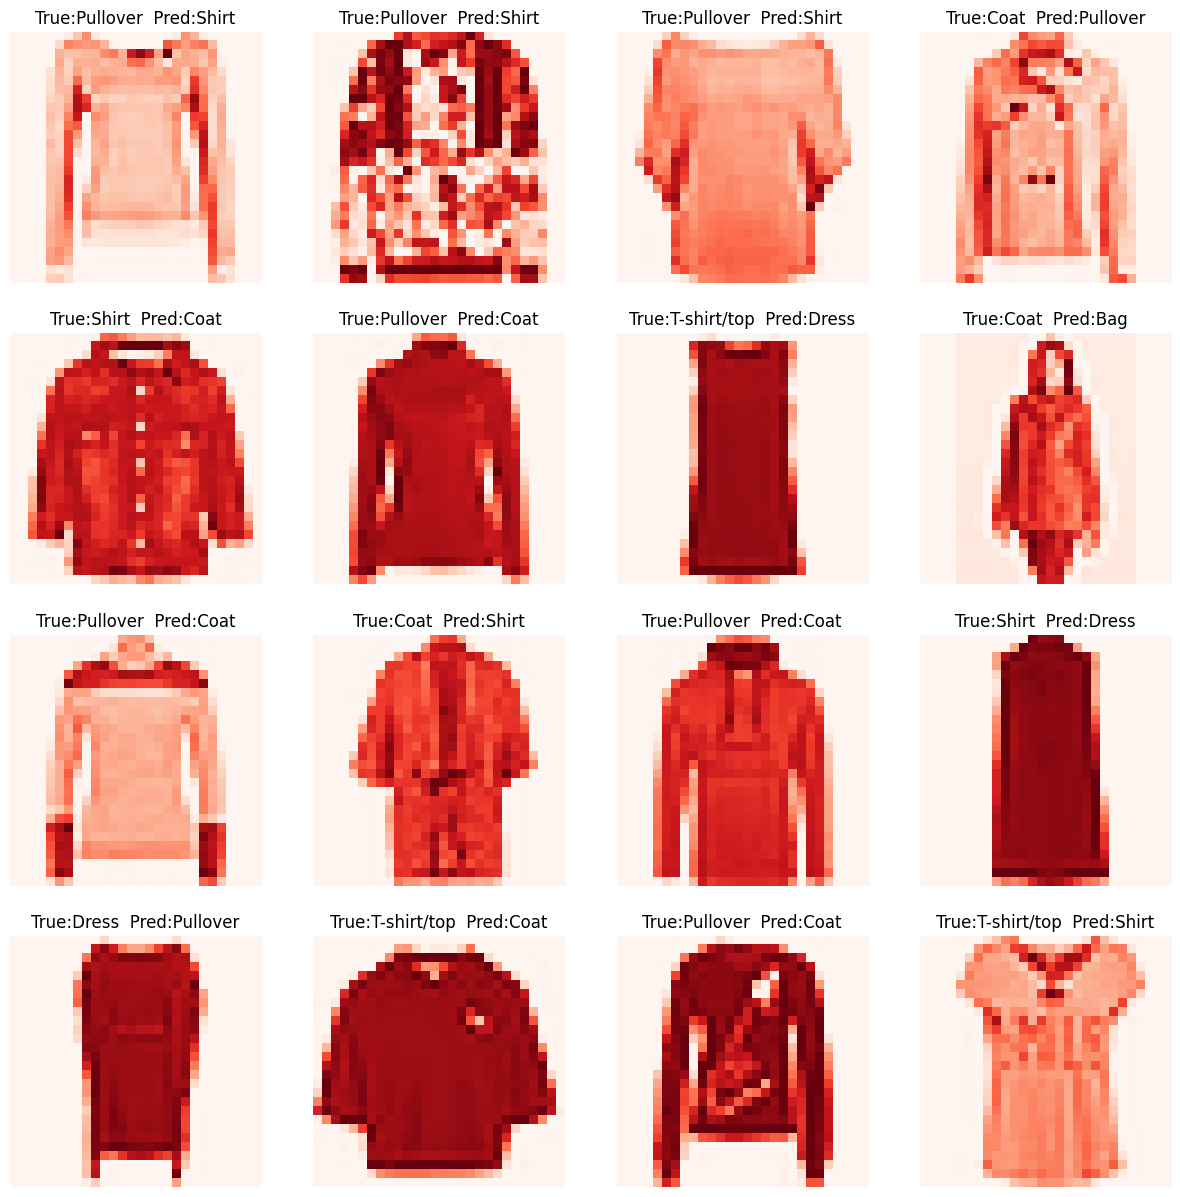

In [ ]:
plot_images(incorrect, "Reds")

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


In [ ]:

# Initialize the model
model = Sequential()

# Flatten the input
model.add(Flatten(input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
#fully connected training time
fc_training_time = time.time() - start_time
print("Fully Connected Training Time:", fc_training_time)

Epoch 1/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1430 - accuracy: 0.9467 - val_loss: 0.3738 - val_accuracy: 0.8870
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1374 - accuracy: 0.9482 - val_loss: 0.3876 - val_accuracy: 0.8840
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1358 - accuracy: 0.9496 - val_loss: 0.3932 - val_accuracy: 0.8842
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1341 - accuracy: 0.9494 - val_loss: 0.3721 - val_accuracy: 0.8917
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1262 - accuracy: 0.9524 - val_loss: 0.3886 - val_accuracy: 0.8914
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1254 - accuracy: 0.9532 - val_loss: 0.3985 - val_accuracy: 0.8882
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1243 - accuracy: 0.9534 - val_loss: 0.4073 - val_accuracy: 0.8896
Epoch 

In [ ]:
## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38391080498695374
Test accuracy: 0.8903999924659729


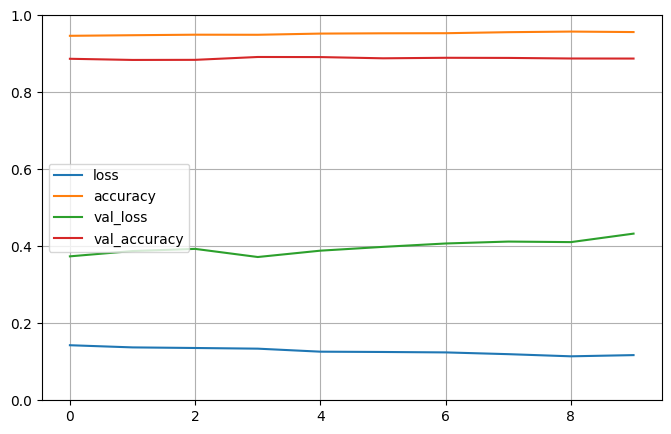

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)


# The CNN takes more time in building the model with approximately 5 minutes for 10 epochs. In addition 10 epochs from the experiment gives the highest accuracy at 93-94%. Also, the test accuracy of 91% shows the model is not overfitting. The test accuracy of suggests that the model generalized well to unseen data even though it was more computationally intensive and expensive due to the complex architecture that involves multiple convolutional and pooling layers.

# For the Fully Connected Neural Network Model, the training time was approximately 23 seconds on 10 Epochs. The accuracy was found to be the lowest from 5-10 epochs with training accuracy of 95% and testing accuracy of 89%. Comparing the accuracy, we can assume the model was overfitted to the training data reducing its performance on unseen data. Although the computational cost was clearly and significantly reduced, the accuracy of the prediciton tasks showed that CNN performs better for image classification tasks.

2. Explore the effect of varying the number of filters in convolutional layers on the performance
of a CNN model trained on the Fashion-MNIST dataset. Design experiments using different
numbers of filters (e.g., 32, 64, 128) in each convolutional layer and analyze how it affects
both accuracy and model complexity.

In [ ]:
## Model Training

model = Sequential()

# Add Convolution 2D
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution 2D
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 3200)              0         
                                                                 
 dense_120 (Dense)           (None, 128)             

In [ ]:
#3 Training the Model
start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('/nTest loss:', score[0])
print('/nTest accuracy:', score[1])

Epoch 1/10
375/375 [==============================] - 200s 531ms/step - loss: 0.5260 - accuracy: 0.8088 - val_loss: 0.3803 - val_accuracy: 0.8586
Epoch 2/10
375/375 [==============================] - 207s 552ms/step - loss: 0.3374 - accuracy: 0.8776 - val_loss: 0.3241 - val_accuracy: 0.8850
Epoch 3/10
375/375 [==============================] - 207s 553ms/step - loss: 0.2877 - accuracy: 0.8950 - val_loss: 0.2821 - val_accuracy: 0.8991
Epoch 4/10
375/375 [==============================] - 203s 542ms/step - loss: 0.2501 - accuracy: 0.9089 - val_loss: 0.2686 - val_accuracy: 0.9036
Epoch 5/10
375/375 [==============================] - 199s 532ms/step - loss: 0.2243 - accuracy: 0.9178 - val_loss: 0.2597 - val_accuracy: 0.9048
Epoch 6/10
375/375 [==============================] - 206s 550ms/step - loss: 0.2034 - accuracy: 0.9247 - val_loss: 0.2759 - val_accuracy: 0.8997
Epoch 7/10
375/375 [==============================] - 201s 536ms/step - loss: 0.1792 - accuracy: 0.9343 - val_loss: 0.2516 -

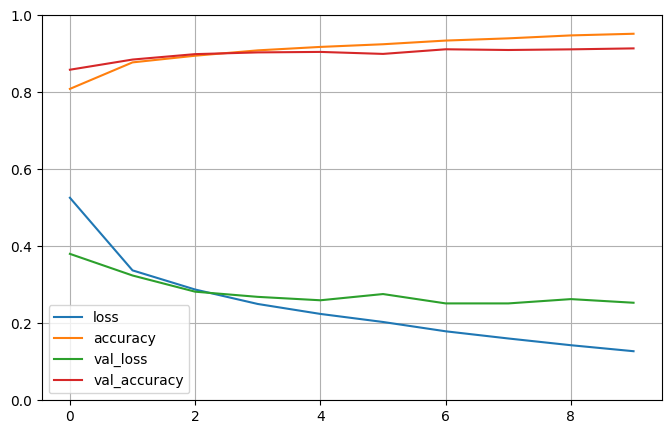

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

#Using 128 as out filters, firstly, the number of trainable parameters doubled in size and there was a very significant cost in computation and complexity (training time was more than 40 mins) with a minor improvement in testing acuracy. The tradeoffs considering computaion for the accuracy is not efficient using this number of filters.  

In [ ]:
## Model Training

model = Sequential()

# Add Convolution 2D
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution 2D
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dense_122 (Dense)           (None, 128)             

In [ ]:
#3 Training the Model
start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('/nTest loss:', score[0])
print('/nTest accuracy:', score[1])

Epoch 1/10
375/375 [==============================] - 70s 183ms/step - loss: 0.5713 - accuracy: 0.7923 - val_loss: 0.4113 - val_accuracy: 0.8497
Epoch 2/10
375/375 [==============================] - 67s 180ms/step - loss: 0.3631 - accuracy: 0.8702 - val_loss: 0.3698 - val_accuracy: 0.8678
Epoch 3/10
375/375 [==============================] - 70s 186ms/step - loss: 0.3148 - accuracy: 0.8860 - val_loss: 0.3167 - val_accuracy: 0.8838
Epoch 4/10
375/375 [==============================] - 68s 182ms/step - loss: 0.2799 - accuracy: 0.8986 - val_loss: 0.2959 - val_accuracy: 0.8936
Epoch 5/10
375/375 [==============================] - 68s 182ms/step - loss: 0.2587 - accuracy: 0.9049 - val_loss: 0.2811 - val_accuracy: 0.8972
Epoch 6/10
375/375 [==============================] - 68s 182ms/step - loss: 0.2367 - accuracy: 0.9138 - val_loss: 0.2841 - val_accuracy: 0.8972
Epoch 7/10
375/375 [==============================] - 68s 182ms/step - loss: 0.2201 - accuracy: 0.9197 - val_loss: 0.2604 - val_ac

#Using 64 as out filters, there was a less significant cost in computation and complexity (training time was a little more than 10 mins) with a minor improvement in testing acuracy.

In [ ]:
## Model Training

model = Sequential()

# Add Convolution 2D
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution 2D
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 1600)              0         
                                                                 
 dense_124 (Dense)           (None, 128)             

In [ ]:
#3 Training the Model
start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('/nTest loss:', score[0])
print('/nTest accuracy:', score[1])

Epoch 1/10
375/375 [==============================] - 144s 382ms/step - loss: 0.5511 - accuracy: 0.8019 - val_loss: 0.4091 - val_accuracy: 0.8533
Epoch 2/10
375/375 [==============================] - 142s 379ms/step - loss: 0.3536 - accuracy: 0.8731 - val_loss: 0.3228 - val_accuracy: 0.8824
Epoch 3/10
375/375 [==============================] - 142s 380ms/step - loss: 0.3019 - accuracy: 0.8908 - val_loss: 0.2963 - val_accuracy: 0.8951
Epoch 4/10
375/375 [==============================] - 143s 381ms/step - loss: 0.2710 - accuracy: 0.9023 - val_loss: 0.2855 - val_accuracy: 0.8955
Epoch 5/10
375/375 [==============================] - 142s 379ms/step - loss: 0.2472 - accuracy: 0.9100 - val_loss: 0.2711 - val_accuracy: 0.9018
Epoch 6/10
375/375 [==============================] - 142s 379ms/step - loss: 0.2214 - accuracy: 0.9195 - val_loss: 0.2744 - val_accuracy: 0.9014
Epoch 7/10
375/375 [==============================] - 141s 377ms/step - loss: 0.2034 - accuracy: 0.9251 - val_loss: 0.2699 -

#Using a mix of 128 and 64 as out filters, firstly, the number of trainable parameters doubled in size and there was a very significant cost in computation and complexity (training time was more than 20 mins) with a minor improvement in testing acuracy. The tradeoffs considering computation for the accuracy is not efficient using this number of filters.  

3. Investigate the effect of different dropout rates on the performance of a CNN model trained on
the Fashion-MNIST dataset. Design experiments using dropout rates of 0.1, 0.3, and 0.5 in
various layers of the CNN architecture and analyze how dropout affects both training and test
accuracy, as well as the model's ability to generalize.

In [ ]:
## Model Training

model = Sequential()

# Add Convolution 2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout
model.add(Dropout(0.5))

# Add Convolution 2D
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout
model.add(Dropout(0.5))

# Add flatten
model.add(Flatten())

# Add Dense layer
model.add(Dense(128, activation='relu'))

# Add Dropout
model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 5, 5, 64)         

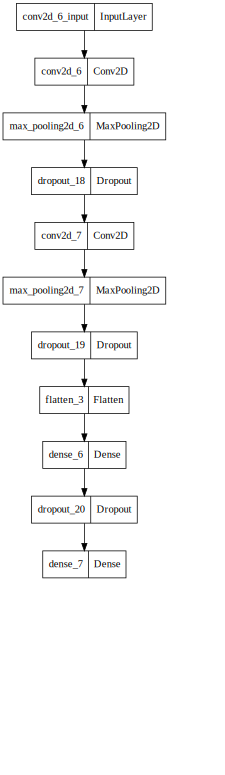

In [ ]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
#3 Training the Model
start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('/nTest loss:', score[0])
print('/nTest accuracy:', score[1])

Epoch 1/10
375/375 [==============================] - 49s 127ms/step - loss: 0.8732 - accuracy: 0.6731 - val_loss: 0.5182 - val_accuracy: 0.8081
Epoch 2/10
375/375 [==============================] - 43s 114ms/step - loss: 0.5755 - accuracy: 0.7851 - val_loss: 0.4568 - val_accuracy: 0.8343
Epoch 3/10
375/375 [==============================] - 47s 124ms/step - loss: 0.5145 - accuracy: 0.8085 - val_loss: 0.4074 - val_accuracy: 0.8512
Epoch 4/10
375/375 [==============================] - 45s 119ms/step - loss: 0.4807 - accuracy: 0.8239 - val_loss: 0.3814 - val_accuracy: 0.8669
Epoch 5/10
375/375 [==============================] - 44s 116ms/step - loss: 0.4475 - accuracy: 0.8358 - val_loss: 0.3544 - val_accuracy: 0.8727
Epoch 6/10
375/375 [==============================] - 42s 113ms/step - loss: 0.4314 - accuracy: 0.8434 - val_loss: 0.3454 - val_accuracy: 0.8750
Epoch 7/10
375/375 [==============================] - 43s 116ms/step - loss: 0.4182 - accuracy: 0.8471 - val_loss: 0.3338 - val_ac

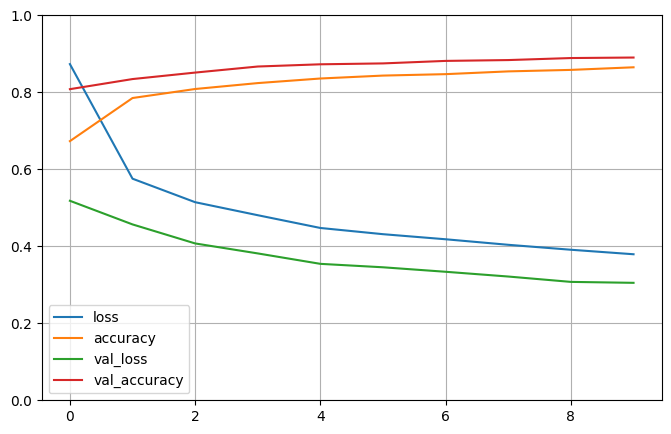

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [ ]:
## Model Training

model = Sequential()

# Add Convolution 2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout
model.add(Dropout(0.3))

# Add Convolution 2D
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout
model.add(Dropout(0.3))

# Add flatten
model.add(Flatten())

# Add Dense layer
model.add(Dense(128, activation='relu'))

# Add Dropout
model.add(Dropout(0.3))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 5, 5, 64)         

Epoch 1/10
375/375 [==============================] - 46s 119ms/step - loss: 0.7164 - accuracy: 0.7369 - val_loss: 0.4646 - val_accuracy: 0.8315
Epoch 2/10
375/375 [==============================] - 46s 122ms/step - loss: 0.4657 - accuracy: 0.8318 - val_loss: 0.3822 - val_accuracy: 0.8587
Epoch 3/10
375/375 [==============================] - 43s 114ms/step - loss: 0.4063 - accuracy: 0.8541 - val_loss: 0.3410 - val_accuracy: 0.8755
Epoch 4/10
375/375 [==============================] - 43s 114ms/step - loss: 0.3694 - accuracy: 0.8668 - val_loss: 0.3188 - val_accuracy: 0.8811
Epoch 5/10
375/375 [==============================] - 43s 116ms/step - loss: 0.3451 - accuracy: 0.8735 - val_loss: 0.3008 - val_accuracy: 0.8860
Epoch 6/10
375/375 [==============================] - 43s 114ms/step - loss: 0.3286 - accuracy: 0.8809 - val_loss: 0.2871 - val_accuracy: 0.8914
Epoch 7/10
375/375 [==============================] - 43s 114ms/step - loss: 0.3133 - accuracy: 0.8847 - val_loss: 0.2806 - val_ac

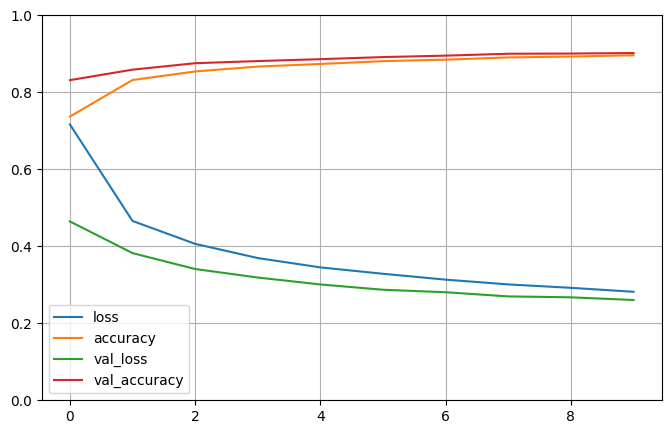

In [ ]:
#3 Training the Model
start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('/nTest loss:', score[0])
print('/nTest accuracy:', score[1])

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [ ]:
## Model Training

model = Sequential()

# Add Convolution 2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout
model.add(Dropout(0.1))

# Add Convolution 2D
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout
model.add(Dropout(0.1))

# Add flatten
model.add(Flatten())

# Add Dense layer
model.add(Dense(128, activation='relu'))

# Add Dropout
model.add(Dropout(0.1))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 5, 5, 64)         

Epoch 1/10
375/375 [==============================] - 46s 119ms/step - loss: 0.6232 - accuracy: 0.7700 - val_loss: 0.4382 - val_accuracy: 0.8359
Epoch 2/10
375/375 [==============================] - 43s 114ms/step - loss: 0.4110 - accuracy: 0.8486 - val_loss: 0.3570 - val_accuracy: 0.8703
Epoch 3/10
375/375 [==============================] - 43s 114ms/step - loss: 0.3524 - accuracy: 0.8717 - val_loss: 0.3272 - val_accuracy: 0.8763
Epoch 4/10
375/375 [==============================] - 43s 114ms/step - loss: 0.3190 - accuracy: 0.8831 - val_loss: 0.2988 - val_accuracy: 0.8912
Epoch 5/10
375/375 [==============================] - 43s 114ms/step - loss: 0.2934 - accuracy: 0.8925 - val_loss: 0.2886 - val_accuracy: 0.8931
Epoch 6/10
375/375 [==============================] - 42s 112ms/step - loss: 0.2717 - accuracy: 0.9001 - val_loss: 0.2669 - val_accuracy: 0.9028
Epoch 7/10
375/375 [==============================] - 43s 114ms/step - loss: 0.2546 - accuracy: 0.9073 - val_loss: 0.2624 - val_ac

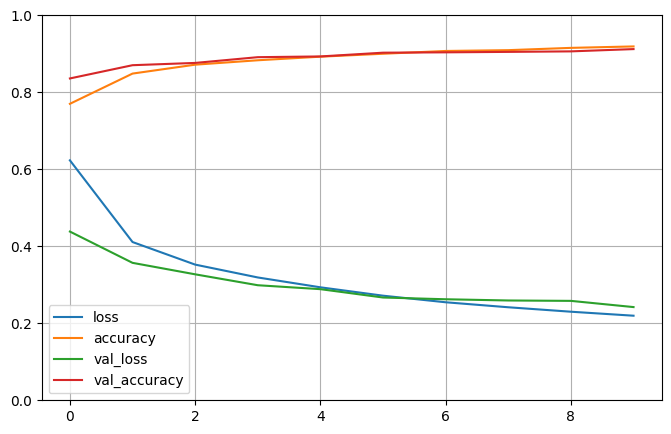

In [ ]:
#3 Training the Model
start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                        epochs=10, verbose=1, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=0)
print('/nTest loss:', score[0])
print('/nTest accuracy:', score[1])

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

# Comparing the accuracy among the three dropout values - 0.1, 0.3, 0.5  - we have the highest accuracy at 0.1 with 92%. In terms of the cost of computation in time, the drop-out values does not adversely affect it.

#4. Investigate the impact of different kernel sizes in convolutional layers on the performance of a CNN model trained on the CIFAR-10 dataset. Design experiments using kernel sizes of 3x3, 5x5, and 7x7, and compare the accuracy and computational efficiency of the resulting models

In [42]:
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

In [43]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [46]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 10  # Number of epochs to train the model
data_augmentation = False

In [70]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=999)

In [72]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


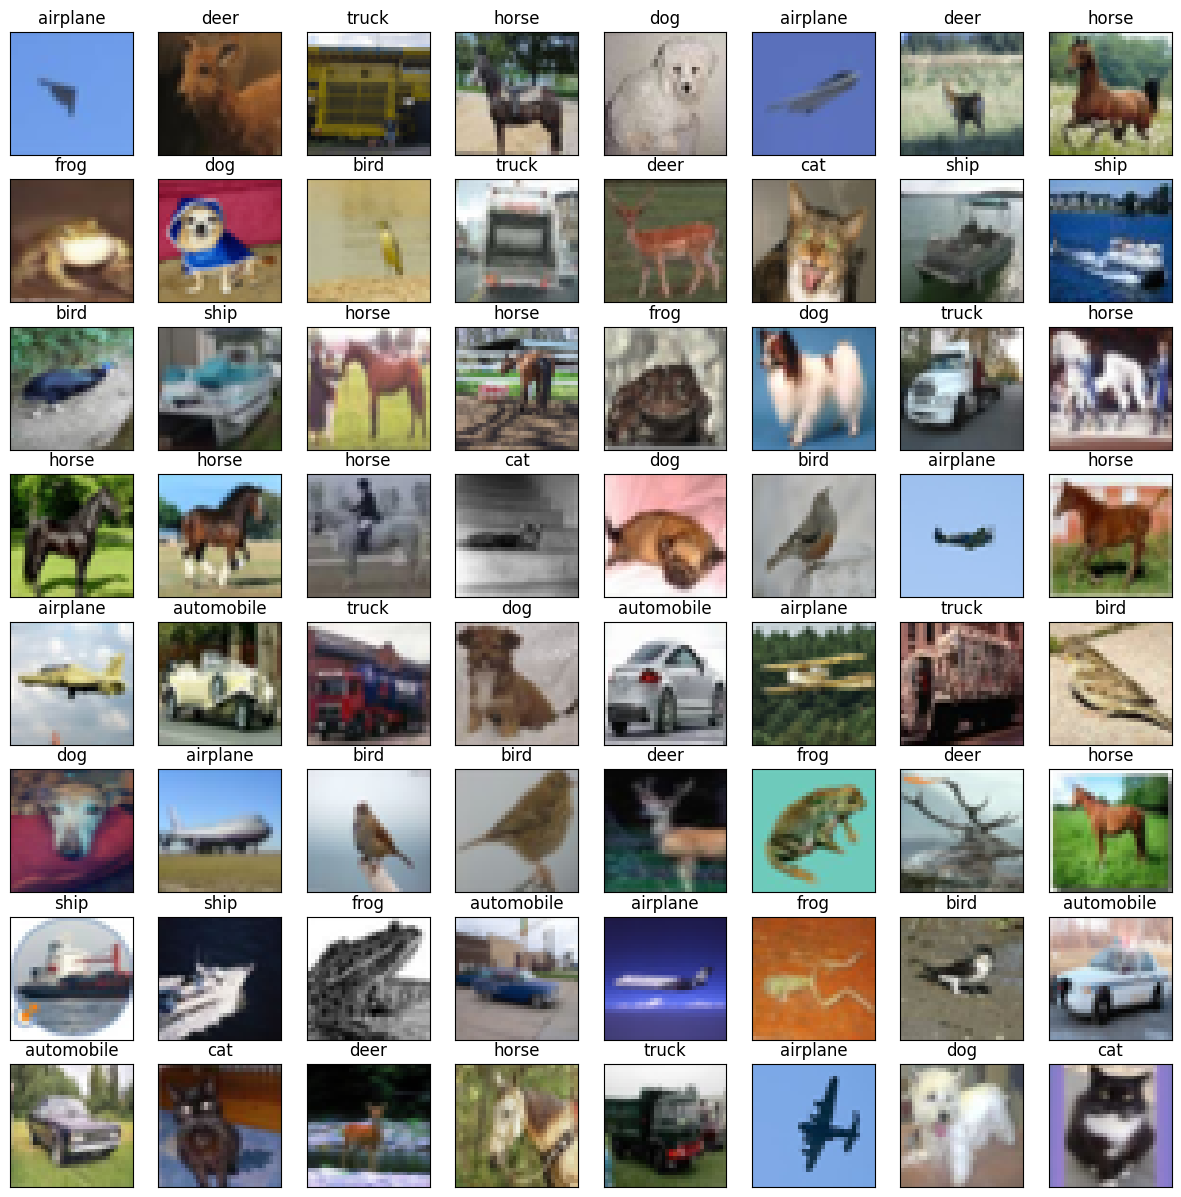

In [73]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()


In [74]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

In [75]:
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test  = to_categorical(y_test, num_classes)

In [76]:
## Model Training

model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
#model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 8, 8, 32)        

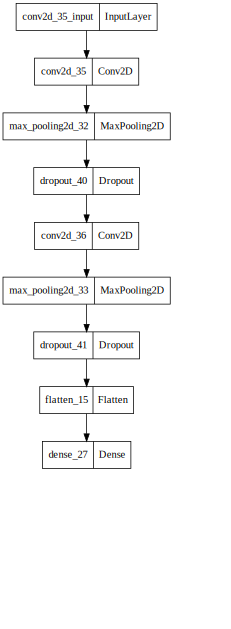

In [78]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [79]:
batch_size = 64

epochs = 10

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)



Epoch 1/10
704/704 - 57s - loss: 1.6323 - accuracy: 0.4174 - val_loss: 1.3744 - val_accuracy: 0.5218 - lr: 5.0000e-04 - 57s/epoch - 81ms/step
Epoch 2/10
704/704 - 53s - loss: 1.3159 - accuracy: 0.5362 - val_loss: 1.2145 - val_accuracy: 0.5878 - lr: 5.0000e-04 - 53s/epoch - 75ms/step
Epoch 3/10
704/704 - 58s - loss: 1.1916 - accuracy: 0.5844 - val_loss: 1.1138 - val_accuracy: 0.6240 - lr: 5.0000e-04 - 58s/epoch - 83ms/step
Epoch 4/10
704/704 - 55s - loss: 1.1136 - accuracy: 0.6123 - val_loss: 1.0658 - val_accuracy: 0.6324 - lr: 5.0000e-04 - 55s/epoch - 78ms/step
Epoch 5/10
704/704 - 51s - loss: 1.0580 - accuracy: 0.6345 - val_loss: 1.0211 - val_accuracy: 0.6444 - lr: 5.0000e-04 - 51s/epoch - 72ms/step
Epoch 6/10
704/704 - 66s - loss: 1.0175 - accuracy: 0.6479 - val_loss: 0.9781 - val_accuracy: 0.6732 - lr: 5.0000e-04 - 66s/epoch - 94ms/step
Epoch 7/10
704/704 - 61s - loss: 0.9871 - accuracy: 0.6614 - val_loss: 0.9657 - val_accuracy: 0.6758 - lr: 5.0000e-04 - 61s/epoch - 87ms/step
Epoch 

In [91]:
## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.9159 - accuracy: 0.6938
Test loss: 0.9159467816352844
Test accuracy: 0.6937999725341797


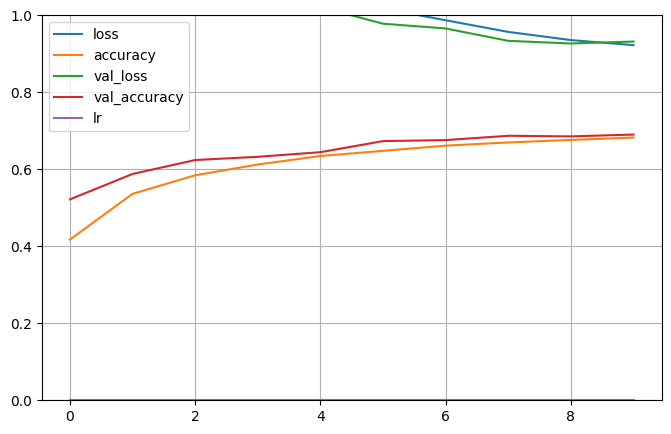

In [92]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [103]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_test = pd.DataFrame(y_test, columns=np.arange(10))
y_true = y_test.iloc[:, 0].values

313/313 [==============================] - 4s 12ms/step


In [104]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [105]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 316
Incorrect predicted classes: 9684


In [106]:
target_names = ["Class {} ({}) :".format(i,class_names[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                        precision    recall  f1-score   support

  Class 0 (airplane) :       0.29      0.03      0.06      9000
Class 1 (automobile) :       0.02      0.02      0.02      1000
      Class 2 (bird) :       0.00      0.00      0.00         0
       Class 3 (cat) :       0.00      0.00      0.00         0
      Class 4 (deer) :       0.00      0.00      0.00         0
       Class 5 (dog) :       0.00      0.00      0.00         0
      Class 6 (frog) :       0.00      0.00      0.00         0
     Class 7 (horse) :       0.00      0.00      0.00         0
      Class 8 (ship) :       0.00      0.00      0.00         0
     Class 9 (truck) :       0.00      0.00      0.00         0

              accuracy                           0.03     10000
             macro avg       0.03      0.01      0.01     10000
          weighted avg       0.27      0.03      0.06     10000



In [109]:
## Model Training

model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 5x5
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
#model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_45 (Dropout)        (None, 8, 8, 32)        

In [112]:
batch_size = 64

epochs = 10

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

Epoch 1/10
704/704 - 113s - loss: 1.4145 - accuracy: 0.4968 - val_loss: 1.2606 - val_accuracy: 0.5540 - lr: 5.0000e-04 - 113s/epoch - 160ms/step
Epoch 2/10
704/704 - 102s - loss: 1.1968 - accuracy: 0.5827 - val_loss: 1.1123 - val_accuracy: 0.6118 - lr: 5.0000e-04 - 102s/epoch - 145ms/step
Epoch 3/10
704/704 - 98s - loss: 1.0804 - accuracy: 0.6245 - val_loss: 1.0052 - val_accuracy: 0.6570 - lr: 5.0000e-04 - 98s/epoch - 140ms/step
Epoch 4/10
704/704 - 106s - loss: 0.9995 - accuracy: 0.6547 - val_loss: 0.9449 - val_accuracy: 0.6752 - lr: 5.0000e-04 - 106s/epoch - 150ms/step
Epoch 5/10
704/704 - 109s - loss: 0.9475 - accuracy: 0.6724 - val_loss: 0.9068 - val_accuracy: 0.6898 - lr: 5.0000e-04 - 109s/epoch - 155ms/step
Epoch 6/10
704/704 - 115s - loss: 0.9093 - accuracy: 0.6884 - val_loss: 0.8966 - val_accuracy: 0.6924 - lr: 5.0000e-04 - 115s/epoch - 163ms/step
Epoch 7/10
704/704 - 119s - loss: 0.8798 - accuracy: 0.6980 - val_loss: 0.8529 - val_accuracy: 0.7120 - lr: 5.0000e-04 - 119s/epoch 

In [113]:
## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 23ms/step - loss: 0.8396 - accuracy: 0.7141
Test loss: 0.839632511138916
Test accuracy: 0.7141000032424927


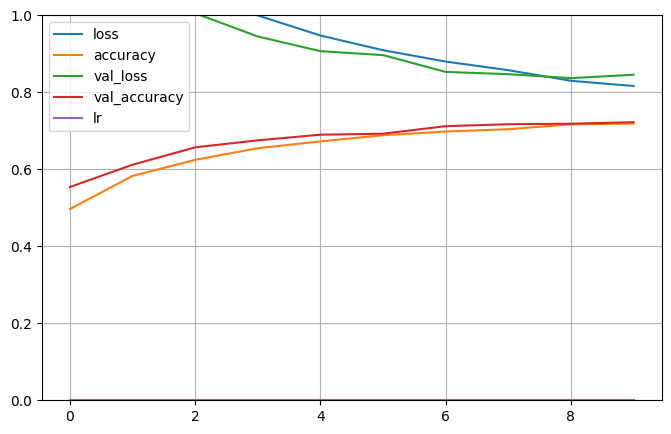

In [114]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [115]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_test = pd.DataFrame(y_test, columns=np.arange(10))
y_true = y_test.iloc[:, 0].values

313/313 [==============================] - 7s 21ms/step


In [116]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [117]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 230
Incorrect predicted classes: 9770


In [118]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.23      0.02      0.04      9000
    Class 1 (Trouser) :       0.02      0.02      0.02      1000
   Class 2 (Pullover) :       0.00      0.00      0.00         0
      Class 3 (Dress) :       0.00      0.00      0.00         0
       Class 4 (Coat) :       0.00      0.00      0.00         0
     Class 5 (Sandal) :       0.00      0.00      0.00         0
      Class 6 (Shirt) :       0.00      0.00      0.00         0
    Class 7 (Sneaker) :       0.00      0.00      0.00         0
        Class 8 (Bag) :       0.00      0.00      0.00         0
 Class 9 (Ankle boot) :       0.00      0.00      0.00         0

               accuracy                           0.02     10000
              macro avg       0.02      0.00      0.01     10000
           weighted avg       0.21      0.02      0.04     10000



In [120]:
## Model Training

model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 7x7
model.add(Conv2D(filters=32, kernel_size=(7,7), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(7,7), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
#model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        4736      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 32)        50208     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 8, 8, 32)        

In [121]:
batch_size = 64

epochs = 10

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

start_time = time.time()
train_model = model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)

Epoch 1/10
704/704 - 171s - loss: 1.5897 - accuracy: 0.4270 - val_loss: 1.3291 - val_accuracy: 0.5390 - lr: 5.0000e-04 - 171s/epoch - 243ms/step
Epoch 2/10
704/704 - 166s - loss: 1.2527 - accuracy: 0.5584 - val_loss: 1.1106 - val_accuracy: 0.6212 - lr: 5.0000e-04 - 166s/epoch - 236ms/step
Epoch 3/10
704/704 - 165s - loss: 1.0959 - accuracy: 0.6170 - val_loss: 1.0202 - val_accuracy: 0.6538 - lr: 5.0000e-04 - 165s/epoch - 234ms/step
Epoch 4/10
704/704 - 164s - loss: 0.9984 - accuracy: 0.6549 - val_loss: 0.9783 - val_accuracy: 0.6674 - lr: 5.0000e-04 - 164s/epoch - 233ms/step
Epoch 5/10
704/704 - 164s - loss: 0.9387 - accuracy: 0.6764 - val_loss: 0.9060 - val_accuracy: 0.6880 - lr: 5.0000e-04 - 164s/epoch - 233ms/step
Epoch 6/10
704/704 - 182s - loss: 0.8958 - accuracy: 0.6914 - val_loss: 0.9285 - val_accuracy: 0.6860 - lr: 5.0000e-04 - 182s/epoch - 259ms/step
Epoch 7/10
704/704 - 183s - loss: 0.8632 - accuracy: 0.7041 - val_loss: 0.8812 - val_accuracy: 0.7050 - lr: 5.0000e-04 - 183s/epoc

In [122]:
## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 11s 37ms/step - loss: 0.8435 - accuracy: 0.7145
Test loss: 0.8435078263282776
Test accuracy: 0.7145000100135803


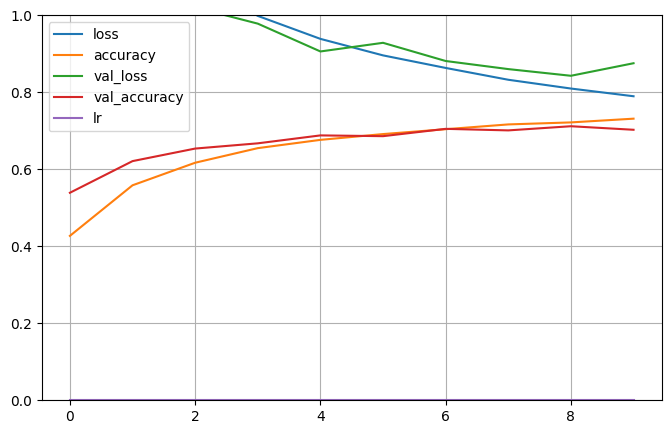

In [123]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [124]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_test = pd.DataFrame(y_test, columns=np.arange(10))
y_true = y_test.iloc[:, 0].values

313/313 [==============================] - 11s 34ms/step


In [125]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [126]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 226
Incorrect predicted classes: 9774


In [127]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.21      0.02      0.04      9000
    Class 1 (Trouser) :       0.03      0.04      0.03      1000
   Class 2 (Pullover) :       0.00      0.00      0.00         0
      Class 3 (Dress) :       0.00      0.00      0.00         0
       Class 4 (Coat) :       0.00      0.00      0.00         0
     Class 5 (Sandal) :       0.00      0.00      0.00         0
      Class 6 (Shirt) :       0.00      0.00      0.00         0
    Class 7 (Sneaker) :       0.00      0.00      0.00         0
        Class 8 (Bag) :       0.00      0.00      0.00         0
 Class 9 (Ankle boot) :       0.00      0.00      0.00         0

               accuracy                           0.02     10000
              macro avg       0.02      0.01      0.01     10000
           weighted avg       0.19      0.02      0.04     10000



The 3x3 kernel model is slower to convergence after 10 epochs in comparison with the 5x5 and 7x7 models. The 7x7 model shows the fastest convergence after 10 epochs as it captures more spatial information and complex  features in the input image faster as compared to the smaller kernel sizes. However, the number of parameters involved in the 7x7 kernel (72000) is more than double that of the 3x3 kernel (31000).  At 10 epochs, the 3x3 kernels also shows a poorer accuracy in comparison with the larger kernels.  In the case of the CIFAR-10 dataset, the 7x7 kernel model demonstrates faster convergence and higher accuracy, suggesting that it is better suited to extract meaningful features from the dataset. However, it comes at the cost of increased model complexity as shown in the time it took to train the model.



#5. Explore the use of data augmentation techniques (e.g., rotation, translation, flipping) in improving the performance of a CNN model trained on the CIFAR-10 dataset. Train two CNN models—one with data augmentation and one without—and compare their generalization performance on a separate validation set. Discuss how data augmentation affects the model's ability to generalize to unseen data

In [128]:
## With data augmentation

# Data augmentation
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,

    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,

    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,

    # Randomly flip images horizontally
    horizontal_flip=True,

    # Zoom images in by up to 10%
    zoom_range=0.1,

    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,

    # Channel shift intensity
    channel_shift_range=0.1,
)

In [129]:
## Model Training

model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
#model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
# Set the batch size for the training
batch_size = 64

# Set the maximum number of epochs for the training
epochs = 10

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 40 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# Fit the model on the training data, using the defined batch size and number of epochs
# The validation data is used to evaluate the model's performance during training
# The callbacks implemented are learning rate reduction when a plateau is reached in validation loss and
# stopping training early if no improvement is observed
start_time = time.time()
model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)



Epoch 1/10
704/704 - 91s - loss: 1.7569 - accuracy: 0.3684 - val_loss: 1.4853 - val_accuracy: 0.4858 - lr: 5.0000e-04 - 91s/epoch - 129ms/step
Epoch 2/10
704/704 - 90s - loss: 1.4917 - accuracy: 0.4648 - val_loss: 1.3722 - val_accuracy: 0.5206 - lr: 5.0000e-04 - 90s/epoch - 127ms/step
Epoch 3/10
704/704 - 91s - loss: 1.4061 - accuracy: 0.4985 - val_loss: 1.2963 - val_accuracy: 0.5438 - lr: 5.0000e-04 - 91s/epoch - 129ms/step
Epoch 4/10
704/704 - 94s - loss: 1.3459 - accuracy: 0.5213 - val_loss: 1.1905 - val_accuracy: 0.5880 - lr: 5.0000e-04 - 94s/epoch - 134ms/step
Epoch 5/10
704/704 - 121s - loss: 1.2983 - accuracy: 0.5409 - val_loss: 1.1716 - val_accuracy: 0.5946 - lr: 5.0000e-04 - 121s/epoch - 173ms/step
Epoch 6/10
704/704 - 99s - loss: 1.2672 - accuracy: 0.5533 - val_loss: 1.2018 - val_accuracy: 0.5834 - lr: 5.0000e-04 - 99s/epoch - 140ms/step
Epoch 7/10
704/704 - 90s - loss: 1.2341 - accuracy: 0.5649 - val_loss: 1.1250 - val_accuracy: 0.6154 - lr: 5.0000e-04 - 90s/epoch - 128ms/st

In [131]:
## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 1.0721 - accuracy: 0.6357
Test loss: 1.0721039772033691
Test accuracy: 0.635699987411499


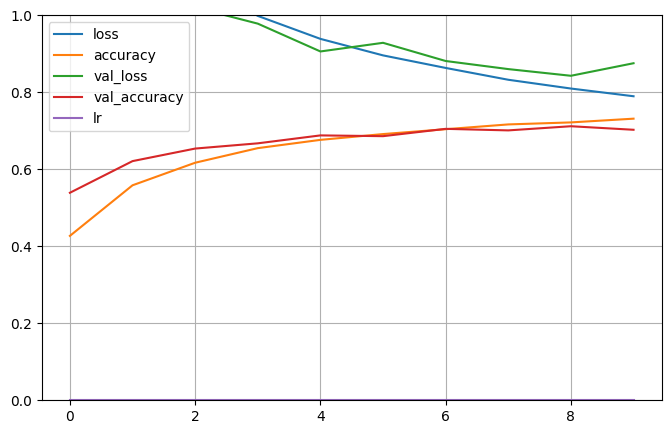

In [132]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [133]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_test = pd.DataFrame(y_test, columns=np.arange(10))
y_true = y_test.iloc[:, 0].values

313/313 [==============================] - 3s 11ms/step


In [134]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [135]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 356
Incorrect predicted classes: 9644


In [136]:
target_names = ["Class {} ({}) :".format(i,class_names[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                        precision    recall  f1-score   support

  Class 0 (airplane) :       0.31      0.03      0.06      9000
Class 1 (automobile) :       0.04      0.05      0.04      1000
      Class 2 (bird) :       0.00      0.00      0.00         0
       Class 3 (cat) :       0.00      0.00      0.00         0
      Class 4 (deer) :       0.00      0.00      0.00         0
       Class 5 (dog) :       0.00      0.00      0.00         0
      Class 6 (frog) :       0.00      0.00      0.00         0
     Class 7 (horse) :       0.00      0.00      0.00         0
      Class 8 (ship) :       0.00      0.00      0.00         0
     Class 9 (truck) :       0.00      0.00      0.00         0

              accuracy                           0.04     10000
             macro avg       0.03      0.01      0.01     10000
          weighted avg       0.28      0.04      0.06     10000



### As observed, the training accuracy after 10 epochs is significantly reduced and poorer (55%) than the model without data augmentation at 68%. However, there is a better testing performance for the data augmented model (63%). This can be attributed to the usefulness of data augmentation as a technique in preventing overfitting as it increases the training data used for training the model thereby capturing a much larger invariance.

#6. Implement a CNN model with batch normalization layers and train it on the CIFAR-10 dataset. Compare the performance of this model against a similar CNN architecture without batch normalization in terms of accuracy, convergence speed, and robustness to hyperparameter choices. Discuss the benefits of batch normalization in training deep neural networks.

In [137]:
## Model Training

model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))

# Add batch normalization layer
model.add(BatchNormalization())

# Add Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add flatten
model.add(Flatten())

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
#model.add(Dense(128, activation='relu'))

# Add Dropout
#model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:

batch_size = 64


epochs = 10


optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

start_time = time.time()
model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)
cnn_training_time = time.time() - start_time
print("/n/nCNN Training Time:", cnn_training_time)



Epoch 1/10
704/704 - 109s - loss: 2.0466 - accuracy: 0.3472 - val_loss: 1.5368 - val_accuracy: 0.4766 - lr: 5.0000e-04 - 109s/epoch - 156ms/step
Epoch 2/10
704/704 - 105s - loss: 1.6032 - accuracy: 0.4434 - val_loss: 1.3750 - val_accuracy: 0.5304 - lr: 5.0000e-04 - 105s/epoch - 150ms/step
Epoch 3/10
704/704 - 108s - loss: 1.4455 - accuracy: 0.4909 - val_loss: 1.3027 - val_accuracy: 0.5500 - lr: 5.0000e-04 - 108s/epoch - 153ms/step
Epoch 4/10
704/704 - 106s - loss: 1.3471 - accuracy: 0.5270 - val_loss: 1.2392 - val_accuracy: 0.5754 - lr: 5.0000e-04 - 106s/epoch - 151ms/step
Epoch 5/10
704/704 - 106s - loss: 1.2829 - accuracy: 0.5490 - val_loss: 1.2073 - val_accuracy: 0.5788 - lr: 5.0000e-04 - 106s/epoch - 150ms/step
Epoch 6/10
704/704 - 105s - loss: 1.2428 - accuracy: 0.5610 - val_loss: 1.2107 - val_accuracy: 0.5952 - lr: 5.0000e-04 - 105s/epoch - 149ms/step
Epoch 7/10
704/704 - 129s - loss: 1.2007 - accuracy: 0.5774 - val_loss: 1.1493 - val_accuracy: 0.6116 - lr: 5.0000e-04 - 129s/epoc

In [139]:
## Test Prediction Accuracy

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 1.1076 - accuracy: 0.6295
Test loss: 1.1075881719589233
Test accuracy: 0.6294999718666077


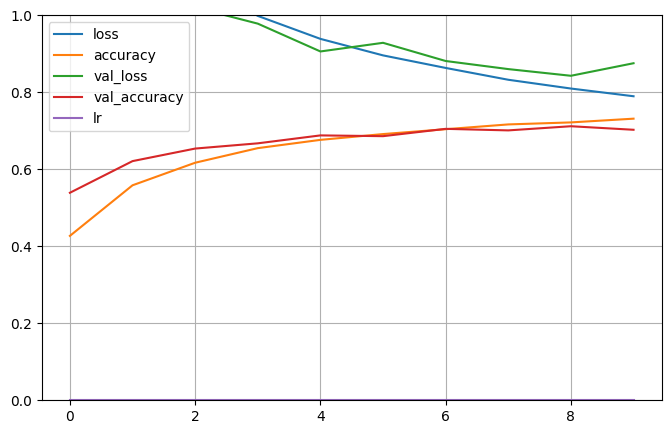

In [140]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(train_model)

In [141]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_test = pd.DataFrame(y_test, columns=np.arange(10))
y_true = y_test.iloc[:, 0].values

313/313 [==============================] - 5s 16ms/step


In [142]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [143]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 272
Incorrect predicted classes: 9728


In [144]:
target_names = ["Class {} ({}) :".format(i,class_names[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                        precision    recall  f1-score   support

  Class 0 (airplane) :       0.24      0.02      0.04      9000
Class 1 (automobile) :       0.05      0.06      0.05      1000
      Class 2 (bird) :       0.00      0.00      0.00         0
       Class 3 (cat) :       0.00      0.00      0.00         0
      Class 4 (deer) :       0.00      0.00      0.00         0
       Class 5 (dog) :       0.00      0.00      0.00         0
      Class 6 (frog) :       0.00      0.00      0.00         0
     Class 7 (horse) :       0.00      0.00      0.00         0
      Class 8 (ship) :       0.00      0.00      0.00         0
     Class 9 (truck) :       0.00      0.00      0.00         0

              accuracy                           0.03     10000
             macro avg       0.03      0.01      0.01     10000
          weighted avg       0.22      0.03      0.04     10000



### At 10 epochs, the only significant information gathered in the comparison between the convergence speed was that the model with batch normalization included was faster than the model without batch normalization. In comparison, the training accuracy of the batch normalization model did not improve but the model could generalize to new data as the testing accuracy improved significantly when compared against the model without batch normalization. In terms of the robustness to hyperparameter choices such as weight decay and the learning rate, the model with batch normalisation had the same convergence rate and accuracy as compared to the model without these layers that took more significant time with reduced accuracy in converging after 10 epochs.